# Sprint 1 Data Collection, Cleaning, and Initial EDA
# Attractions
---

## Data Collection

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [2]:
# load and view vancouver attractions data
# NOTE: the data is a combination of smaller csv files across multiple queries
df_van_attractions = pd.read_csv("merged_van_attractions_v1.csv", index_col = 0)
df_van_attractions

,name,description,is_spending_on_ads,reviews,competitors,website,phone,can_claim,owner_name,owner_profile_link,...,main_category,categories,rating,workday_timing,is_temporarily_closed,closed_on,address,review_keywords,link,query
place_id,,,,,,,,,,,,,,,,,,,,,
ChIJG3q8d85zhlQRIH1pyAsVpEc,Granville Island Public Market,"Popular indoor market with restaurants, bars &...",NaN,22501,Name: Stock Market\r\nLink: https://www.google...,https://granvilleisland.com/public-market,(604) 666-6655,NaN,Granville Island Public Market (Owner),https://www.google.com/maps/contrib/1024457972...,...,Market,"Market, Fresh food market",4.6,9 a.m.-6 p.m.,1.0,Open All Days,"Public Market, 1689 Johnston St, Vancouver, BC...","ferry, donuts, artisan, water taxi, seagulls, ...",https://www.google.com/maps/place/Granville+Is...,tourist attractions food markets vancouver bc
ChIJY8PhL01whlQRYv1frnB1lSw,Shipyards Night Market,Shipyards Night Market 2.0\r\n\r\nWe would lik...,NaN,1198,Name: Lonsdale Quay Market\r\nLink: https://ww...,https://shipyardsnightmarket.com/,NaN,NaN,Shipyards Night Market (Owner),https://www.google.com/maps/contrib/1079804521...,...,Night market,Night market,4.5,3-10 p.m.,1.0,"Monday, Tuesday, Wednesday, Thursday, Saturday...","19 Wallace Mews, North Vancouver, BC V7L 0B2","food trucks, live music, vendors, beer garden,...",https://www.google.com/maps/place/Shipyards+Ni...,tourist attractions food markets vancouver bc
ChIJtbuSI01whlQR_OK5YhRz1x8,The Shipyards,A world class development with mixed-use comme...,NaN,1474,Name: The Shipyards District\r\nLink: https://...,http://theshipyards.net/,(604) 982-8383,NaN,The Shipyards (Owner),https://www.google.com/maps/contrib/1093883736...,...,Tourist attraction,"Tourist attraction, Event venue, Restaurant",4.7,Open 24 hours,NaN,Open All Days,"125 Victory Ship Way, North Vancouver, BC V7L 0B3","summer, winter, ice rink, cafes, food trucks, ...",https://www.google.com/maps/place/The+Shipyard...,tourist attractions food markets vancouver bc
ChIJ9Vwt10xwhlQRQuBpePVtbTk,Lonsdale Quay Market,"Sizable, waterfront marketplace with unique re...",NaN,7206,Name: Shipyards Night Market\r\nLink: https://...,http://www.lonsdalequay.com/,(604) 985-6261,NaN,Lonsdale Quay Market (Owner),https://www.google.com/maps/contrib/1086607953...,...,Market,"Market, Fresh food market",4.4,9 a.m.-7 p.m.,1.0,Open All Days,"123 Carrie Cates Ct, North Vancouver, BC V7M 3K7","food court, hotel, fish and chips, ferry, ocea...",https://www.google.com/maps/place/Lonsdale+Qua...,tourist attractions food markets vancouver bc
ChIJx_oD9UxwhlQRh46E2nmrFJM,Foxy Farm Market,NaN,NaN,212,Name: Sy Farm Market\r\nLink: https://www.goog...,NaN,(604) 770-4937,NaN,Foxy Farm Market (Owner),https://www.google.com/maps/contrib/1105859020...,...,Market,"Market, Produce market",4.9,7 a.m.-7 p.m.,NaN,Sunday,"108 W 1st St, North Vancouver, BC V7M 1A9","prices, produce, local, grocery store, organic...",https://www.google.com/maps/place/Foxy+Farm+Ma...,tourist attractions food markets vancouver bc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJoSBsvdpxhlQRNedOEm4HPw4,Canada Place Welcome Centre,NaN,NaN,107,Name: Destination Vancouver Corporate Office\r...,http://www.canadaplace.ca/,(604) 665-9000,1.0,Canada Place Welcome Centre (Owner),NaN,...,Tourist information center,Tourist information center,4.6,NaN,NaN,Open All Days,"Vancouver, BC V6C 3T4","to walk, cruise, port, shuttle",https://www.google.com/maps/place/Canada+Place...,tourist attractions vancouver bc
ChIJw0hK6zINhlQRIW3ZYH7JiJs,Greenheart TreeWalk,Reopening April 2024. | Enjoy a self-guided to...,NaN,198,Name: UBC Rose Garden\r\nLink: https://www.goo...,http://botanicalgarden.ubc.ca/visit/greenheart...,(604) 690-3895,NaN,Greenheart TreeWalk (Owner),https://www.google.com/maps/contrib/1094381138...,...,Tourist attraction,"Tourist attraction, Tour operator",4.7,10 a.m.-4 p.m.,1.0,Monday,"Campbell Building, 6804 SW Marine Dr, Vancouve...","trees, kids

TASK: Find high-level information about this dataset such as:
1. Data shape and size
2. Column names
3. Data types

In [3]:
# check for data shape and size
print(f'The Vancouver tourist attractions dataset consists of {df_van_attractions.shape[0]} rows and {df_van_attractions.shape[1]} columns.')
print(f'The dataset consists of {df_van_attractions.size} elements.')

The Vancouver tourist attractions dataset consists of 532 rows and 21 columns.
The dataset consists of 11172 elements.


In [4]:
# check column names
df_van_attractions.columns

Index(['name', 'description', 'is_spending_on_ads', 'reviews', 'competitors',
       'website', 'phone', 'can_claim', 'owner_name', 'owner_profile_link',
       'featured_image', 'main_category', 'categories', 'rating',
       'workday_timing', 'is_temporarily_closed', 'closed_on', 'address',
       'review_keywords', 'link', 'query'],
      dtype='object')

In [5]:
# check for data types
df_van_attractions.dtypes

name                      object
description               object
is_spending_on_ads       float64
reviews                    int64
competitors               object
website                   object
phone                     object
can_claim                float64
owner_name                object
owner_profile_link        object
featured_image            object
main_category             object
categories                object
rating                   float64
workday_timing            object
is_temporarily_closed    float64
closed_on                 object
address                   object
review_keywords           object
link                      object
query                     object
dtype: object

#### Data Collection Findings

There are 537 row and 21 columns. All columns are set to object data type due to merging multiple csv file. Not all columns will be used in the csv file. 

The following columns will be used for tge uocoming recommendation system model 
- name
- description
- reviews
- website
- main_category
- categories
- rating
- address
- review_keywords

The following columns will be converted be changed to float64 or int64 for EDA: rating, reviews

--- 

## Data Cleaning  

In [6]:
# filter columns for upcoming model
df_van_attractions = df_van_attractions[['name','description','reviews','website','main_category','categories','rating','address','review_keywords']]
df_van_attractions

,name,description,reviews,website,main_category,categories,rating,address,review_keywords
place_id,,,,,,,,,
ChIJG3q8d85zhlQRIH1pyAsVpEc,Granville Island Public Market,"Popular indoor market with restaurants, bars &...",22501,https://granvilleisland.com/public-market,Market,"Market, Fresh food market",4.6,"Public Market, 1689 Johnston St, Vancouver, BC...","ferry, donuts, artisan, water taxi, seagulls, ..."
ChIJY8PhL01whlQRYv1frnB1lSw,Shipyards Night Market,Shipyards Night Market 2.0\r\n\r\nWe would lik...,1198,https://shipyardsnightmarket.com/,Night market,Night market,4.5,"19 Wallace Mews, North Vancouver, BC V7L 0B2","food trucks, live music, vendors, beer garden,..."
ChIJtbuSI01whlQR_OK5YhRz1x8,The Shipyards,A world class development with mixed-use comme...,1474,http://theshipyards.net/,Tourist attraction,"Tourist attraction, Event venue, Restaurant",4.7,"125 Victory Ship Way, North Vancouver, BC V7L 0B3","summer, winter, ice rink, cafes, food trucks, ..."
ChIJ9Vwt10xwhlQRQuBpePVtbTk,Lonsdale Quay Market,"Sizable, waterfront marketplace with unique re...",7206,http://www.lonsdalequay.com/,Market,"Market, Fresh food market",4.4,"123 Carrie Cates Ct, North Vancouver, BC V7M 3K7","food court, hotel, fish and chips, ferry, ocea..."
ChIJx_oD9UxwhlQRh46E2nmrFJM,Foxy Farm Market,NaN,212,NaN,Market,"Market, Produce market",4.9,"108 W 1st St, North Vancouver, BC V7M 1A9","prices, produce, local, grocery store, organic..."
...,...,...,...,...,...,...,...,...,...
ChIJoSBsvdpxhlQRNedOEm4HPw4,Canada Place Welcome Centre,NaN,107,http://www.canadaplace.ca/,Tourist information center,Tourist information center,4.6,"Vancouver, BC V6C 3T4","to walk, cruise, port, shuttle"
ChIJw0hK6zINhlQRIW3ZYH7JiJs,Greenheart TreeWalk,Reopening April 2024. | Enjoy a self-guided to...,198,http://botanicalgarden.ubc.ca/visit/greenheart...,Tourist attraction,"Tourist attraction, Tour operator",4.7,"Campbell Building, 6804 SW Marine Dr, Vancouve...","trees, kids, botanical gardens, to walk, adven..."
ChIJu2FuomZzhlQRq_tPtY1pIQ0,Vancouver Views,NaN,0,NaN,Tourist attraction,Tourist attraction,0.0,"1668 Davie St, Vancouver, BC V6G 0C4",NaN


In [7]:
# drop null last row
df_van_attractions = df_van_attractions[:-1]

In [8]:
# convert reviews and rating in df_van_attractions to int64
df_van_attractions = df_van_attractions.astype({'reviews': int, 'rating': float})
df_van_attractions.dtypes

name                object
description         object
reviews              int32
website             object
main_category       object
categories          object
rating             float64
address             object
review_keywords     object
dtype: object


---

## Initial Exploratory Data Analysis

- Check for Null Values
- Check for Duplicated Columns/Rows
- Check the Number of Unique Values in Main Category 
- Distribution of Rating and Review Data

In [10]:
# check for null values in data
df_van_attractions.isna().sum()

name                 0
description        175
reviews              0
website            155
main_category        0
categories           0
rating               0
address              0
review_keywords     38
dtype: int64

In [15]:
# check for rows where null values are present 
null_df = df_van_attractions.isnull().any(axis=1)
null_rows = df_van_attractions[null_df]
print(null_rows)

                                                    name description  reviews  \
place_id                                                                        
ChIJx_oD9UxwhlQRh46E2nmrFJM             Foxy Farm Market         NaN      212   
ChIJGxDGGoRxhlQR-o4BAj-H0eQ                   Urban Fare         NaN     1181   
ChIJAw8lFNdzhlQRwSXGg7-RMXc                   Urban Fare         NaN     1489   
ChIJEeP1HYFxhlQRQe5IxZwviV8                   Urban Fare         NaN     1494   
ChIJhdX87IdxhlQRfvoDbYyLpNU         Robson Public Market         NaN      297   
...                                                  ...         ...      ...   
ChIJYZRldiFyhlQRKAwf2_XOZcc     Ceperley Park Playground         NaN      292   
ChIJ4eZqHpBzhlQRbF5hkWtQPN8              Devonshire Park         NaN       72   
ChIJ463WQ7FyhlQR-LzU0BG7Qz0              UBC Rose Garden         NaN      728   
ChIJoSBsvdpxhlQRNedOEm4HPw4  Canada Place Welcome Centre         NaN      107   
ChIJu2FuomZzhlQRq_tPtY1pIQ0 

In [11]:
# count for duplicated rows in the dataset
len(df_van_attractions)-len(df_van_attractions.drop_duplicates())

207

In [12]:
# view unique values for main_category
df_van_attractions["main_category"].value_counts()

main_category
Park                   127
Tourist attraction      69
Historical landmark     51
Shopping mall           31
Scenic spot             24
                      ... 
Vegan restaurant         1
Lebanese restaurant      1
Heritage museum          1
Recreation center        1
Playground               1
Name: count, Length: 75, dtype: int64

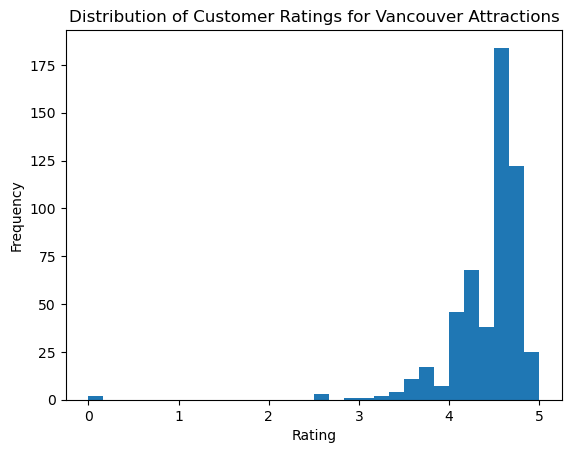

In [13]:
# plot histogram for ratings 
plt.figure()
plt.title('Distribution of Customer Ratings for Vancouver Attractions')
plt.hist(df_van_attractions['rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

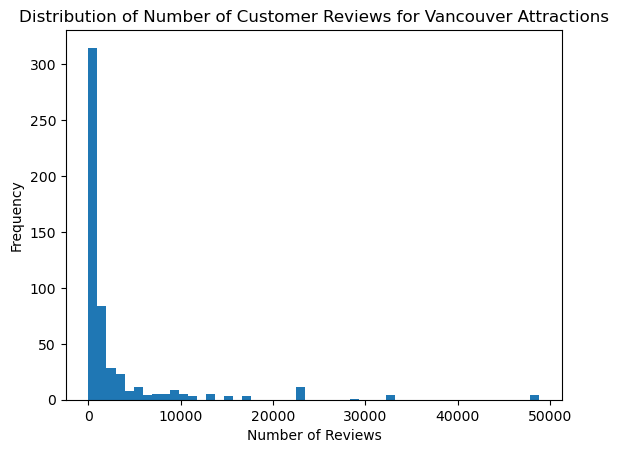

In [14]:
# plot histogram for number of reviews 
plt.figure()
plt.title('Distribution of Number of Customer Reviews for Vancouver Attractions')
plt.hist(df_van_attractions['reviews'],bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

#### Initial EDA Findings

The data requires further collection and cleaning before proceding to using the baseline model.

There are 263 rows of data containing null values out of the total 532 rows. The columns description, website, and review_keywords are where the data has null values. Since those values won't be used in the baseline model, there is no need to replace them at this point. Those columns are meant to give additional insight to users about the attraction.    

There are 207 rows of duplicated data out of the total 532 rows. The reason for this duplicated data is from the querying from Google Maps Extractor. The more you query specific types of tourist attractions, the more likely the results tend to overlap. Tourist attractions can fall under many types. For example, Stanley Park is a result of being a landmark and nature type of tourist attraction. The next steps would be to drop the duplicated data and expand the scope of the queries to go beyond Vancouver such as North Vancouver, West Vancouver, Burnaby, and Richmond.

From the main_category, there are 75 unique values. For the next steps, those that have one or few counts of cateogry can be added to a larger category type. From 75 unique main categories to 5: Landmarks, Nature, Shopping, Food Markets, Other. For example, Playground can be under the collected Nature category.  

The distribution of data for rating and reviews are skewed to a certain range which could impact model evaluation. The rating for attractions is skewed right towards range of 4 to 5 stars out of 5. The reason for the skewed ratings can come from how the search engine for Google Maps and their own recommendation model. The number of reviews for attractions is skewed left towards 0-5000 reviews. The next steps would be to transform the data prior to the baseline model to ensure the columns are treated equally.

The proposed baseline model would be to explore Unsupervised Learning, specifically Clustering as there are no known target variables in this dataset.  
